### Visuals and stats for hatchery v wild escapements
By: G Oldford

Modified Apr 2022 

Data In: 
1. Data downloaded from RMIS database 
- 'HoodCan_CSV19806.txt'
- 'MidPS_CSV19806.txt'
- 'NorthPS_CSV19806.txt'
- 'SkagitR_CSV19806.txt'
- 'SouthPS_CSV19806.txt'
https://www.rmis.org//rmis_login.php?action=Login&system=cwt

Purpose:
1. Quantify US Salish Sea hatchery releases

Notes:
- NPAFC stats are aggregated to Washington State, not disaggregated to outer coast and SS
- uncertain whether the RMIS data are complete, or restricted to releases that are linked to CWT programs


In [1]:
import plotly_express as px
import pandas as pd
import altair as alt
import vega as v

#alt.renderers.enable('jupyterlab')
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

In [3]:
f_hood = "HoodCan_CSV19806.txt"
f_midPS = "MidPS_CSV19806.txt"
f_nPS = "NorthPS_CSV19806.txt"
f_skagR = "SkagitR_CSV19806.txt"
f_sPS = "SouthPS_CSV19806.txt"
localpath_data = "C:/Users/Greig/Sync/6. SSMSP Model/Model Greig/Data/1. Salmon/All Species Hatchery Releases/RMISHatcheryReleasesPuget/ORIGINAL/"

df_hood = pd.read_csv(localpath_data + f_hood ,parse_dates=['first_release_date'])
df_midPS = pd.read_csv(localpath_data + f_midPS ,parse_dates=['first_release_date'])
df_nPS = pd.read_csv(localpath_data + f_nPS ,parse_dates=['first_release_date'])
df_skagR = pd.read_csv(localpath_data + f_skagR ,parse_dates=['first_release_date'])
df_sPS = pd.read_csv(localpath_data + f_sPS ,parse_dates=['first_release_date'])

df_all = df_hood.append(df_midPS)
df_all = df_all.append(df_nPS)
df_all = df_all.append(df_skagR)
df_all = df_all.append(df_sPS)

df_all['year'] = df_all['first_release_date'].astype(str).str[:4].astype(int)

#’1’=Chinook
#’2’=Coho
#’3’=Steelhead
#’4’=Sockeye
#’5’=Chum
#’6’=Pink
#’7’=Masu
#’8’=Cutthroat
#’9’=Atlantic Salmon
df_all.loc[df_all['species'] == 1, 'species_name'] = 'Chinook'
df_all.loc[df_all['species'] == 2, 'species_name'] = 'Coho'
df_all.loc[df_all['species'] == 3, 'species_name'] = 'Steelhead'
df_all.loc[df_all['species'] == 4, 'species_name'] = 'Sockeye'
df_all.loc[df_all['species'] == 5, 'species_name'] = 'Chum'
df_all.loc[df_all['species'] == 6, 'species_name'] = 'Pink'
df_all.loc[df_all['species'] == 7, 'species_name'] = 'Masu'
df_all.loc[df_all['species'] == 8, 'species_name'] = 'Cutthroat'
df_all.loc[df_all['species'] == 9, 'species_name'] = 'Atlantic Salmon'

df_all['total_rel_GO'] = df_all['tagged_adclipped'] + df_all['tagged_unclipped'] + df_all['untagged_adclipped'] + df_all['untagged_unclipped'] + df_all['untagged_unknown']
df_all['year'] = pd.to_datetime(df_all.year, format='%Y')

# no need for masu
df_all = df_all.loc[df_all['species_name']!="Masu"]


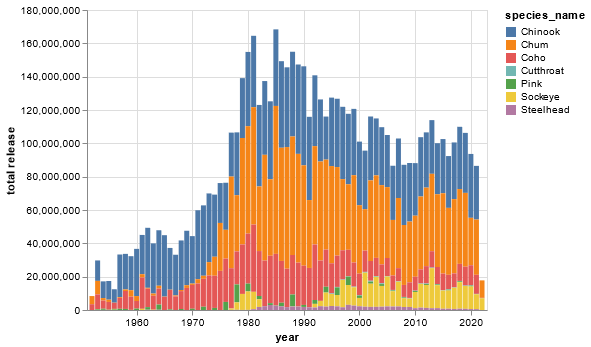

In [4]:
source1 = df_all.groupby(['year','species_name'])['total_rel_GO'].sum().reset_index()


alt.Chart(source1).mark_bar().encode(
    x='year',
    y=alt.Y('total_rel_GO', title='total release'),
    color='species_name'
)

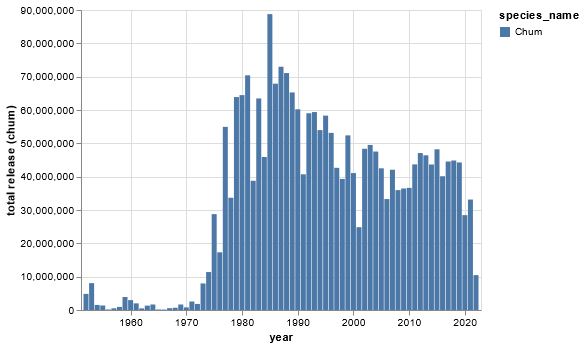

In [5]:
source1 = df_all.loc[df_all['species_name']=='Chum'].groupby(['year','species_name'])['total_rel_GO'].sum().reset_index()


alt.Chart(source1).mark_bar().encode(
    x='year',
    y=alt.Y('total_rel_GO', title='total release (chum)'),
    color='species_name'
)

In [31]:
df_all.columns

Index(['record_code', 'format_version', 'submission_date', 'reporting_agency',
       'release_agency', 'coordinator', 'tag_code_or_release_id', 'tag_type',
       'first_sequential_number', 'last_sequential_number',
       'related_group_type', 'related_group_id', 'species', 'run',
       'brood_year', 'first_release_date', 'last_release_date',
       'release_location_code', 'hatchery_location_code',
       'stock_location_code', 'release_stage', 'rearing_type', 'study_type',
       'release_strategy', 'avg_weight', 'avg_length', 'study_integrity',
       'cwt_1st_mark', 'cwt_1st_mark_count', 'cwt_2nd_mark',
       'cwt_2nd_mark_count', 'non_cwt_1st_mark', 'non_cwt_1st_mark_count',
       'non_cwt_2nd_mark', 'non_cwt_2nd_mark_count', 'counting_method',
       'tag_loss_rate', 'tag_loss_days', 'tag_loss_sample_size', 'tag_reused',
       'comments', 'release_location_name', 'hatchery_location_name',
       'stock_location_name', 'release_location_state',
       'release_location_rmis_